# Interesting Combinations Review

The goal of this notebook is to make it easier to review some of the interesting combinations
produced by the script make_interesting_combinations.py

In [2]:
import env
from data.voxels import read_voxel_array, plot_voxels
from data.stl import plot_mesh, read_mesh_vectors
import pandas as pd
import numpy as np
import os


# plot things
%matplotlib inline
# autoreload modules
%load_ext autoreload
%autoreload 2

In [3]:
root_dir = '../../3d-form-output/combinations'

In [17]:
def _plot_stl(stlfile):
    stl_data = read_mesh_vectors(stlfile)
    plot_mesh(stl_data, title=os.path.basename(stlfile))
    return


def _plot_binvox(voxfile):
    vox_data = np.load(voxfile)
    plot_voxels(vox_data, title=os.path.basename(voxfile))
    return


def _plot_combo(obj1, obj2):
    path = os.path.join(root_dir, obj1)
    if os.path.exists(path):
        _plot_stl(os.path.join(path, obj1 + '.stl'))
        _plot_stl(os.path.join(path, obj2 + '.stl'))
        combo_root = os.path.join(path, '{}__{}'.format(obj1, obj2))
        _plot_stl(combo_root + '.baseline.stl')
        _plot_stl(combo_root + '.stl')
        _plot_binvox(combo_root + '.binvox.npy')
    return


def plot_combo(obj1, obj2):
    # try both combos; only one should exist
    _plot_combo(obj1, obj2)
    _plot_combo(obj2, obj1)
    return


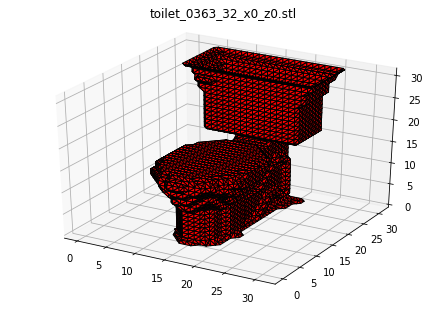

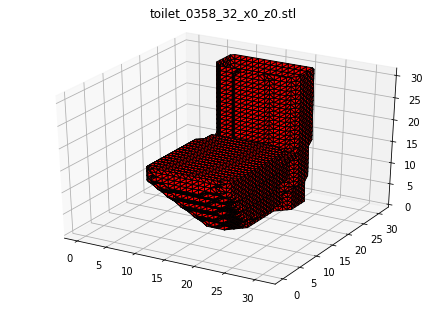

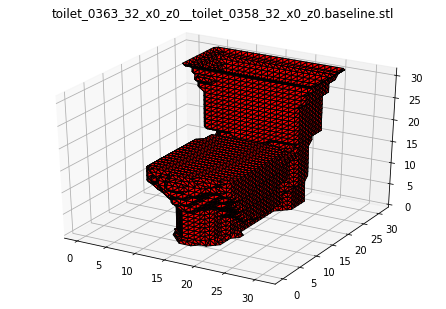

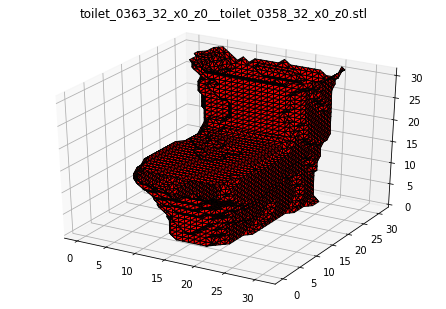

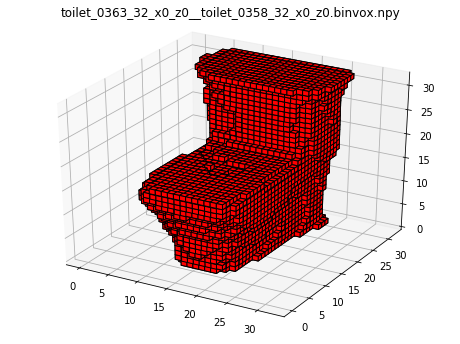

In [18]:
obj1 = 'toilet_0363_32_x0_z0'
obj2 = 'toilet_0358_32_x0_z0'
plot_combo(obj1, obj2)

***
toilet_0363_32_x0_z0
---
toilet_0363_32_x0_z0__toilet_0358_32_x0_z0.baseline.stl
toilet_0363_32_x0_z0__toilet_0358_32_x0_z0.binvox.npy
toilet_0358_32_x0_z0.stl
toilet_0363_32_x0_z0.stl
toilet_0363_32_x0_z0__toilet_0358_32_x0_z0.stl


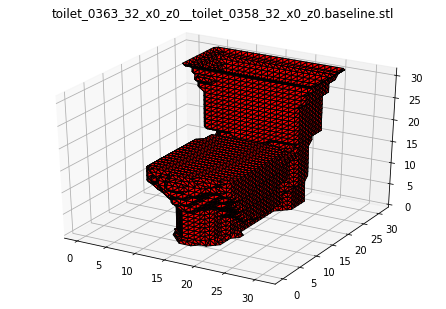

In [ ]:
### iterate over all and plot -- doesn't work too much plotting
for obj1 in os.listdir(root_dir):
    print('***')
    print(obj1)
    print('---')
    obj_path = os.path.join(root_dir, obj1)
    for datafile in os.listdir(obj_path):
        print(datafile)
        datapath = os.path.join(obj_path, datafile)
        if '.stl' in datafile:
            stl_data = read_mesh_vectors(datapath)
            plot_mesh(stl_data, title=datafile)
        elif '.binvox.npy' in datafile:
            vox_data = np.load(datapath)
            plot_voxels(stl_data, title=datafile)
        else:
            print('unrecognized file: {}'.format(datafile))
    # uncomment if you want to do more
    break